## Übung zu Kapitel 8

In dieser Übung vertiefen wir die Regression. Hierzu vergleichen wir die Varianten der linearen Regression auf einem Datensatz und bewerten die Güte. Außerdem versuchen wir, die Modelle anhand der Koeffizienten zu verstehen. Als [Daten verwenden wir wieder Hauspreise](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing), nur diesmal aus Kalifornien.

### Trainings- und Testdaten

Laden Sie die Daten. Teilen Sie die Daten so auf, dass Sie 50% der Daten zum Training und 50% der Daten zum Testen verwenden. 

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

data = fetch_california_housing()
print(data.DESCR)

X = data.data
Y = data.target
predictors = data.feature_names

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

### Trainieren, Testen, Bewerten

Benutzen Sie die verschiedenen Varianten der linearen Regression, um ein Modell der Hauspreise zu erstellen. Was sind die Unterschiede zwischen OLS/Ridge/Lasso/Elastic Net? Finden Sie gute Werte für die Stärke der Regularisierung. Untersuchen Sie, wie sich die Güte, gemessen mit $R^2$ und Adjusted $R^2$, auf den Testdaten verändert. Visualisieren Sie die Koeffizienten als Balkendiagramme, um die Modelle und die Auswirkung der Regularisierung zu verstehen.

Wir trainieren und testen alle Modelle mit scikit-learn. Wir wählen $\alpha=1, 1000$ für Ridge und $\alpha=0,1, 1$ für Lasso. Für das Elastic Net nutzen wir $\alpha=0,1$ und $\rho=0,5$. Wir visualisieren die Ergebnisse, indem wir die Vorhersagen gegen die wahren Werte plotten, sowie durch die Modellkoeffizienten.

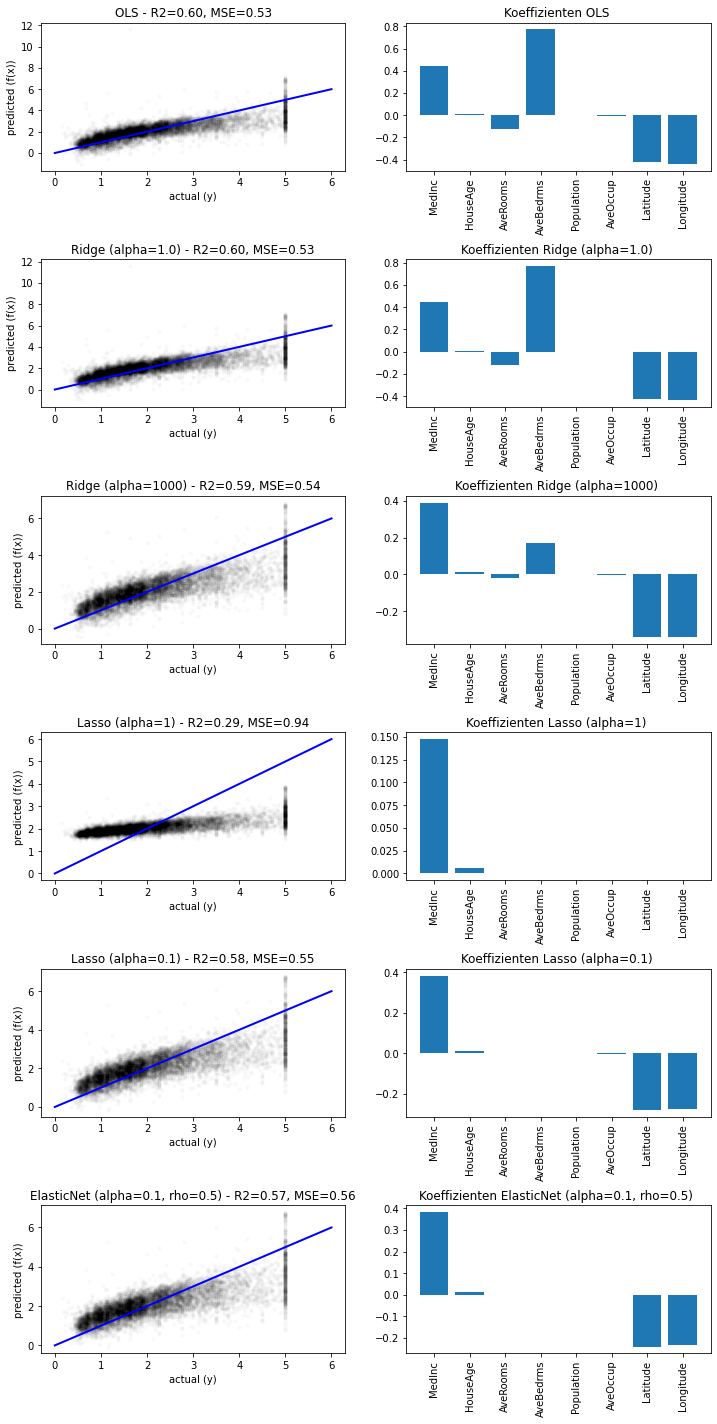

In [2]:
# Setup models
models = [linear_model.LinearRegression(), 
          linear_model.Ridge(alpha=1),
          linear_model.Ridge(alpha=1000),
          linear_model.Lasso(alpha=1), 
          linear_model.Lasso(alpha=0.05), 
          linear_model.ElasticNet(alpha=0.1), ]
names = ['OLS','Ridge (alpha=1.0)', 'Ridge (alpha=1000)', 'Lasso (alpha=1)','Lasso (alpha=0.1)', 'ElasticNet (alpha=0.1, rho=0.5)']

# Training and prediction
Y_pred = {}
for i,model in enumerate(models):
    model.fit(X_train,Y_train)
    Y_pred[names[i]] = model.predict(X_test)

# Visualize Results
fig, axes = plt.subplots(len(models),2, figsize=(12,3.5*len(models)))
y_max = 6
for i, (model, name) in enumerate(zip(models, names)):
    r2 = r2_score(Y_test, Y_pred[name])
    mse = mean_squared_error(Y_test, Y_pred[name])

    axes[i,0].set_title('%s - R2=%.2f, MSE=%.2f' % (name, r2, mse))
    axes[i,0].scatter(Y_test, Y_pred[names[i]],  color='black', s=10, alpha=0.02)
    axes[i,0].plot([0, y_max],[0,y_max] , color='blue', linewidth=2)
    axes[i,0].set_xlabel('actual (y)')
    axes[i,0].set_ylabel('predicted (f(x))')

    
    axes[i,1].set_title('Koeffizienten %s ' % name)
    axes[i,1].bar(predictors, model.coef_)
    axes[i,1].tick_params(axis='x', labelrotation=90)

plt.subplots_adjust(left=None, bottom=0, right=None,
                    top=None, wspace=None, hspace=0.6)
plt.show()

Die Vorhersagen der Modelle sind sich ähnlich, mit Ausnahme des Lassomodells mit $\alpha=1$. Dies gilt sowohl für die Metriken $R^2$ und MSE, als auch für den visuellen Vergleich. Man sieht ebenfalls das die Werte von $y$, welche größer als 5 sind, alle als 5,00001 zusammengefasst sind. 

In [3]:
sum(data.target==5.00001)

965

Soetwas kann einfach passieren, wenn man Daten ohne die vorherige Analyse der Verteilungen der Merkmale benutzt. Wir wiederholen daher die Regressionsanalyse ohne die Instanzen mit $y>5$.

Entferne 965 Instanzen mit y>5


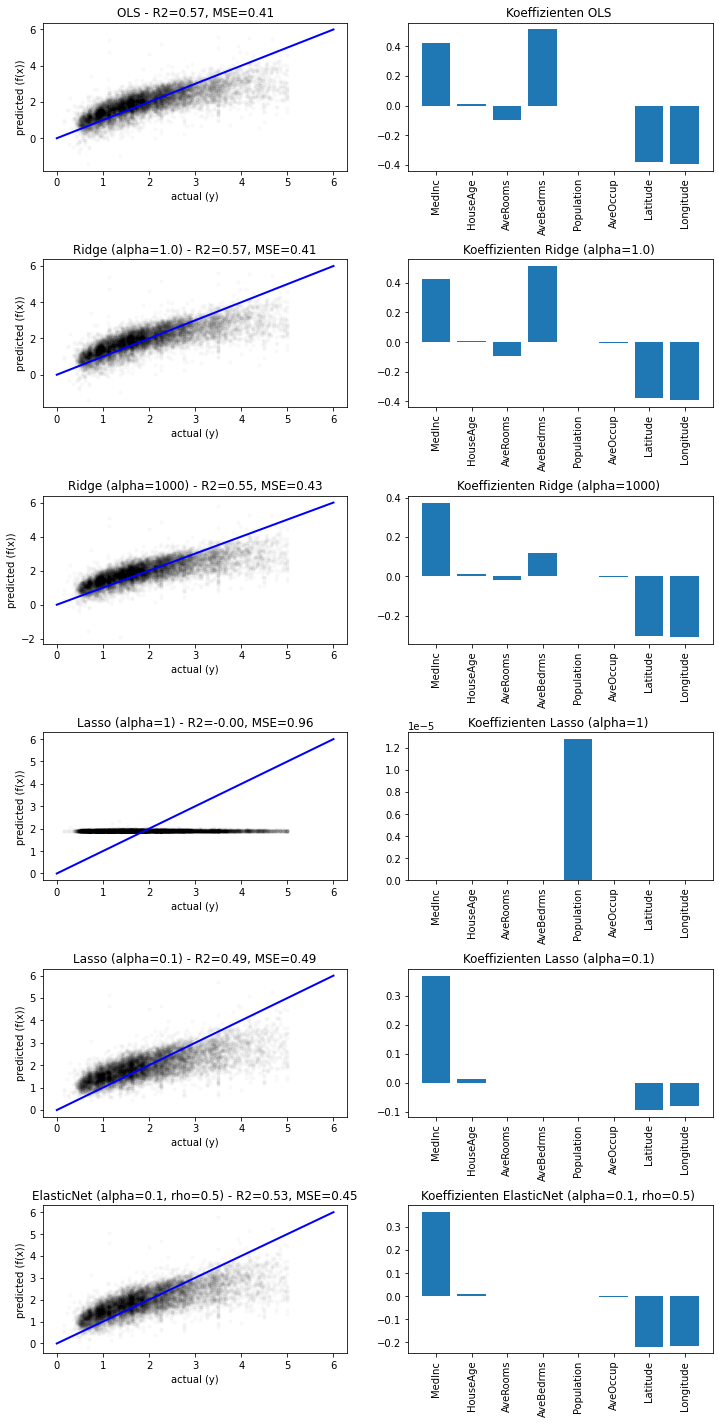

In [4]:
print('Entferne %i Instanzen mit y>5' % sum(data.target>5))
X = data.data[data.target<=5]
Y = data.target[data.target<=5]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

# Setup models
models = [linear_model.LinearRegression(), 
          linear_model.Ridge(alpha=1),
          linear_model.Ridge(alpha=1000),
          linear_model.Lasso(alpha=1), 
          linear_model.Lasso(alpha=0.1), 
          linear_model.ElasticNet(alpha=0.1), ]
names = ['OLS','Ridge (alpha=1.0)', 'Ridge (alpha=1000)', 'Lasso (alpha=1)','Lasso (alpha=0.1)', 'ElasticNet (alpha=0.1, rho=0.5)']

# Training and prediction
Y_pred = {}
for i,model in enumerate(models):
    model.fit(X_train,Y_train)
    Y_pred[names[i]] = model.predict(X_test)

# Visualize Results
fig, axes = plt.subplots(len(models),2, figsize=(12,3.5*len(models)))
y_max = 6
for i, (model, name) in enumerate(zip(models, names)):
    r2 = r2_score(Y_test, Y_pred[name])
    mse = mean_squared_error(Y_test, Y_pred[name])

    axes[i,0].set_title('%s - R2=%.2f, MSE=%.2f' % (name, r2, mse))
    axes[i,0].scatter(Y_test, Y_pred[names[i]],  color='black', s=10, alpha=0.02)
    axes[i,0].plot([0, y_max],[0,y_max] , color='blue', linewidth=2)
    axes[i,0].set_xlabel('actual (y)')
    axes[i,0].set_ylabel('predicted (f(x))')

    
    axes[i,1].set_title('Koeffizienten %s ' % name)
    axes[i,1].bar(predictors, model.coef_)
    axes[i,1].tick_params(axis='x', labelrotation=90)

plt.subplots_adjust(left=None, bottom=0, right=None,
                    top=None, wspace=None, hspace=0.6)
plt.show()

Hierdurch haben sich die Ergebnisse kaum verändert, außer für Lasso mit $\alpha=1,0$, wo das Ergebnis noch schlechter geworden ist. Dies liegt daran, dass die Regularisierungsstärke zu hoch ist, so dass zu viele Merkmale auf null gesetzt werden. Mit $\alpha=0.1$ arbeitet das Lasso wie erwartet und setzt einige Koeffizienten auf null ohne dabei die Güte des Models wesentlich zu verschlechtern. Mit Ridge beobachten wir das Gegenteil. Bei $\alpha=1,0$ passiert nichts und wir haben noch das gleiche Ergebnis wie ohne die Regularisierung. Wenn wir jedoch $\alpha=1000$ wählen, sieht man wie die Werte der Koeffizienten sinken. Besonders ausgeprägt ist dieser Effekt bei den Merkmalen `AveRooms` und `AveBedrms`, also den Merkmalen die beide die Raumanzahl berücksichtigen. Dies macht intuitiv Sinn, da diese Merkmale wahrscheinlich korreliert sind. Mit Lasso, sind lediglich die Koeffizienten der Merkmale `MedInc`, `HouseAge`, `Latitude` und `Longitude` noch wichtig. Es scheint also auch in Californien wie sonst auch auf dem Immobilienmarkt zu sein: Es zählt die Lage. In der visuellen Analyse sieht man außerdem noch, dass der Hauspreis bei teuren Häusern systematisch zu niedrig geschätzt wird. 

### Nichtlineare Regression

Verwenden Sie eines der Modelle, die wir zum Abschluss des Kapitels genannt haben, zum Beispiel eine Random Forest Regression. Vergleichen Sie die Güte mit den linearen Modellen.

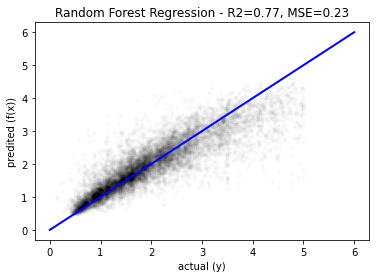

In [5]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)

fig, ax = plt.subplots()
r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
ax.set_title('Random Forest Regression - R2=%.2f, MSE=%.2f' % (r2, mse))
ax.scatter(Y_test, Y_pred,  color='black', s=10, alpha=0.02)
ax.plot([0, y_max],[0,y_max] , color='blue', linewidth=2)
ax.set_xlabel('actual (y)')
ax.set_ylabel('predited (f(x))')
plt.show()

Wie man sieht, ist die Regression mit einem Random Forest genauer, als mit einer linearen Regression. Das liegt daran, dass es sich vermutlich nicht um einen linearen Zusammenhang handelt, sondern um ein komplexeres Problem. Dies kann von einem Random Forest besser erfasst werden, so dass sich die Daten besser erklären lassen. Trotzdem bleibt auch beim Random Forest noch eine Tendenz, zu niedrige Werte bei hohen Hauspreisen vorherzusagen. Ein klarer Nachteil des Random Forests ist es, dass wir nicht mehr die Werte der Koeffizienten begutachten können. 